# Logistic map

Let us initially simulate the traditional logistic map em 1D.

In [15]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
%matplotlib inline
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr
import tigramite.data_processing as pp
import skccm as ccm
import skccm.data as data
from skccm.utilities import train_test_split

In [16]:
def CCM_calculator(x1, x2, lag = 1, embed = 2, epsilon = 0.05):
    e1 = ccm.Embed(x1)
    e2 = ccm.Embed(x2)
    X1 = e1.embed_vectors_1d(lag,embed)
    X2 = e2.embed_vectors_1d(lag,embed)
    
    #split the embedded time series
    x1tr, x1te, x2tr, x2te = train_test_split(X1,X2, percent=.75)

    CCM = ccm.CCM() #initiate the class

    #library lengths to test
    len_tr = len(x1tr)
    lib_lens = np.arange(10, len_tr, len_tr/20, dtype='int')
    #lib_lens = [10,20]

    #test causation
    CCM.fit(x1tr,x2tr)
    x1p, x2p = CCM.predict(x1te, x2te,lib_lengths=lib_lens)

    sc1,sc2 = CCM.score()
    
    return((1-sc1[-1])<epsilon)

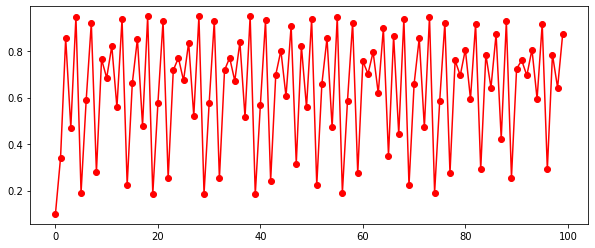

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
plt.figure(figsize=(10,4))
    
def logistic(x0,a,tmax):
    x = np.zeros(tmax)
    x[0] = x0
    for t in range(0,tmax-1):
        x[t+1] = a*x[t]*(1-x[t])
    return x

tmax = 100
x0 = 0.1
a = 3.8
x = logistic(x0,a,tmax)
    
plt.plot(np.arange(0,len(x)),x,'ro-')
plt.show(True)

Two-dimensional Poincaré plots:

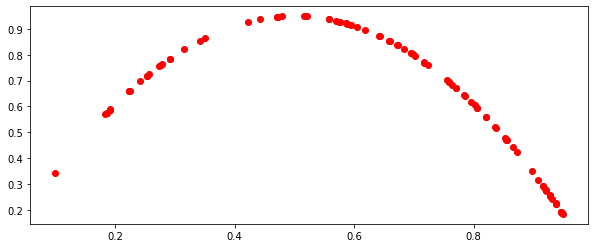

In [18]:
plt.figure(figsize=(10,4))

for t in range(0,tmax-1):
    plt.plot(x[t],x[t+1], 'ro')
plt.show(True)

### Networks

Let us adapt the logistic map to netowrks.

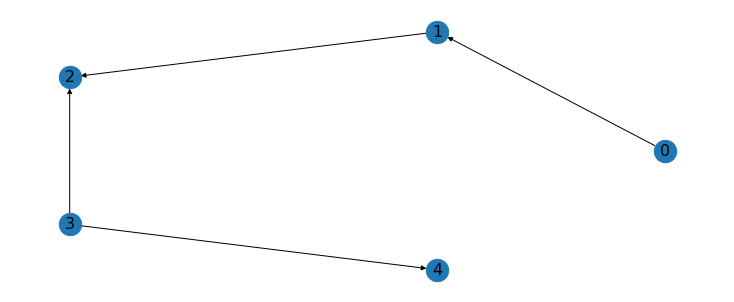

In [19]:
import networkx as nx
plt.figure(figsize=(10,4))

#N = 10
#av_degree = 1
#p = av_degree/(N-1)
#G = nx.gnp_random_graph(N, p, seed=None, directed=False)

#pos = nx.fruchterman_reingold_layout(G);
#plt.figure(figsize=(8,8));
#plt.axis("off");
#nx.draw_networkx_nodes(G, pos, node_size=300, node_color="black");
#nx.draw_networkx_edges(G, pos, alpha=0.500);
#nx.draw_networkx_labels(G, pos, font_color="white");
#plt.show();

edgelist=[(0,1),(1,2), (3,4),(3,2)]
G = nx.DiGraph(edgelist)
#G = nx.Graph(edgelist)
N = np.max(edgelist)

pos=nx.circular_layout(G)
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)

In [21]:
tmax = 1000
N = len(G.nodes)
x = np.zeros((N,tmax))
M = len(G.edges)
sigma = 3
a = 3.8
x[:,0] = np.random.uniform(0,1,N)
for t in range(0,tmax-1):
    for i in G.nodes:
        x[i,t+1] = a*x[i,t]*(1-x[i,t])
        for j in G.predecessors(i): #for directed networks
        #for j in G.neighbors(i): # for undirected networks
            x[i,t+1] = x[i,t+1] + (sigma/M)*(a*x[j,t]*(1-x[j,t])-a*x[i,t]*(1-x[i,t]))

print('Time series for each node:\n')
for i in G.nodes:
    #print('Node:', i,'Neig:', list(G.predecessors(i)))
    print('Node:', i, ':', x[i,:],'\n')

Time series for each node:

Node: 0 : [0.70749589 0.78639273 0.63832097 0.87729577 0.40906202 0.91857508
 0.28422062 0.77306919 0.66664622 0.84447034 0.4990927  0.94999687
 0.1805107  0.56212103 0.93533572 0.22983469 0.67264069 0.83674174
 0.51909901 0.94861387 0.18523328 0.57350326 0.92946963 0.24911219
 0.71081017 0.78112448 0.6496823  0.86486179 0.44412832 0.93813775
 0.22053419 0.65321566 0.86079485 0.45534289 0.94242182 0.20619914
 0.621988   0.89345193 0.36174321 0.87736323 0.40886858 0.91844124
 0.28464632 0.77376661 0.665197   0.84629781 0.49429574 0.94987635
 0.18092281 0.56312104 0.93485979 0.23140847 0.67586263 0.83247487
 0.52994975 0.94659145 0.1921131  0.5897815  0.91936928 0.28169176
 0.76889775 0.6752372  0.83330931 0.52783864 0.94705504 0.19053881
 0.58608833 0.92183744 0.27380207 0.75557109 0.70179698 0.79525632
 0.61873008 0.89643204 0.35279822 0.86766022 0.43633866 0.93459949
 0.23226849 0.67761539 0.83012054 0.53587762 0.94510863 0.19713758
 0.60144255 0.91089575 0

### Correlation

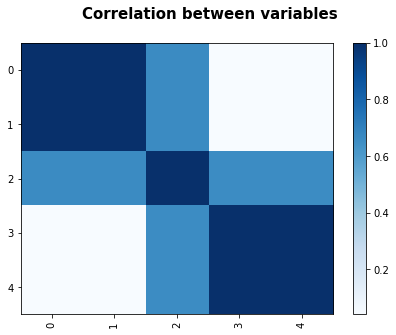

In [22]:
import pandas as pd # biblioteca pandas
data = pd.DataFrame(data=x.T)

corr = data.corr()
plt.figure(figsize=(7, 5))
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

In [23]:
corr

,0,1,2,3,4
0,1.000000,0.998734,0.665178,0.040666,0.041198
1,0.998734,1.000000,0.666136,0.043968,0.043170
2,0.665178,0.666136,1.000000,0.659196,0.659245
3,0.040666,0.043968,0.659196,1.000000,0.999532
4,0.041198,0.043170,0.659245,0.999532,1.000000


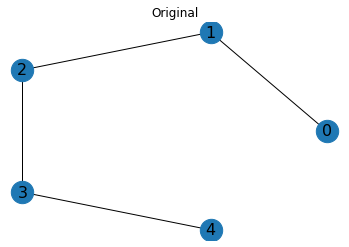

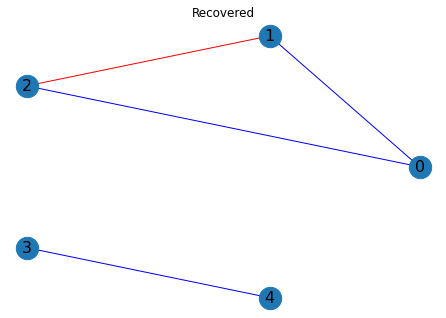

In [24]:
G = G.to_undirected()
plt.title('Original')
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)

corr = np.array(corr)
for i in range(corr.shape[0]):
    corr[i,i] = -np.inf
edges = []
color = []
# I need to fix this, colors are not rigth
for m in range(0,M):
    i,j = np.where(corr == np.max(corr))
    corr[i,j] = -np.inf
    edges.append((i[0],j[0]))
    if(G.has_edge(i[0],j[0])):
        color.append('blue')
    else:
        color.append('red')

G2 = nx.Graph(edges)
nx.draw(G2, with_labels = True, node_size=500, font_size=16, pos = pos, edge_color = color)
plt.title('Recovered')
plt.show(True)

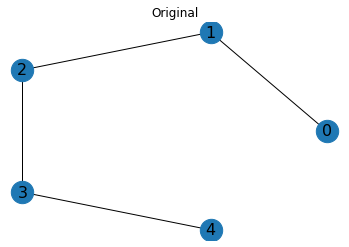

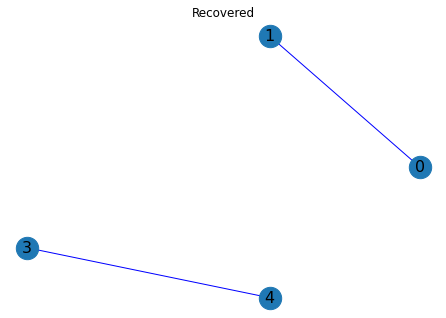

In [32]:
G = G.to_undirected()
plt.title('Original')
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)


edges = []
color = []
# I need to fix this, colors are not rigth
M = x.shape[0]
for i in range(M):
    for j in range(M): 
        if i!=j and CCM_calculator(x[i,:],x[j,:],lag=4, embed=5, epsilon=0.1):
            edges.append((i,j))
            if(G.has_edge(i,j)):
                color.append('blue')
            else:
                color.append('red')

G2 = nx.Graph(edges)
nx.draw(G2, with_labels = True, node_size=500, font_size=16, pos = pos, edge_color = color)
plt.title('Recovered')
plt.show(True)

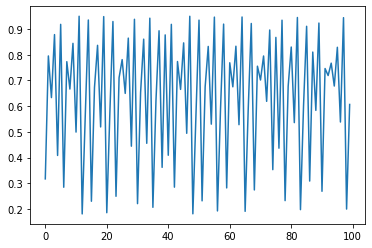

In [45]:
plt.plot(x1[:100])

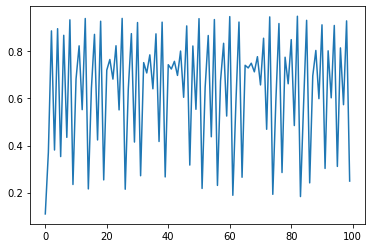

In [46]:
plt.plot(x2[:100])

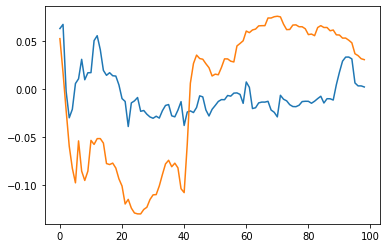

In [42]:
x1 = x[1,:]
x2 = x[3,:]

lag = 2
embed = 4
e1 = ccm.Embed(x1)
e2 = ccm.Embed(x2)
X1 = e1.embed_vectors_1d(lag,embed)
X2 = e2.embed_vectors_1d(lag,embed)

#split the embedded time series
x1tr, x1te, x2tr, x2te = train_test_split(X1,X2, percent=.75)

CCM = ccm.CCM() #initiate the class

#library lengths to test
len_tr = len(x1tr)
lib_lens = np.arange(10, len_tr, len_tr/100, dtype='int')
#lib_lens = [10,20]

#test causation
CCM.fit(x1tr,x2tr)
x1p, x2p = CCM.predict(x1te, x2te,lib_lengths=lib_lens)

sc1,sc2 = CCM.score()

plt.plot(np.arange(len(sc1)),sc1,np.arange(len(sc1)),sc2)

In [43]:
lib_lens

array([ 10,  17,  24,  31,  38,  45,  52,  59,  66,  73,  80,  87,  94,
       101, 108, 115, 122, 129, 136, 143, 150, 157, 164, 171, 178, 185,
       192, 199, 206, 213, 220, 227, 234, 241, 248, 255, 262, 269, 276,
       283, 290, 297, 304, 311, 318, 325, 332, 339, 346, 353, 360, 367,
       374, 381, 388, 395, 402, 409, 416, 423, 430, 437, 444, 451, 458,
       465, 472, 479, 486, 493, 500, 507, 514, 521, 528, 535, 542, 549,
       556, 563, 570, 577, 584, 591, 598, 605, 612, 619, 626, 633, 640,
       647, 654, 661, 668, 675, 682, 689, 696])